In [ ]:
import numpy as np
np.random.seed(42)

#generate the data
a1=0.30       #coefficient for variable 1 (X1)
a2=0.60       #coefficient for variable 2 (X2)

#sample 500 values for X1 from an uniform distribution
x1=np.random.uniform(-5,5,500)

#sample 500 values for X2 from a normal distribution
x2=np.random.normal(-1,1,500)

#error in observation as a gaussian
e=np.random.normal(-0.5,0.5,500) 

#create the data matrix to estimate the underlying linear function y=a1*x1+a2*x2
data=np.zeros((500,2))  #create X (data matrix)
data[:,0]=x1[0:500]
data[:,1]=x2[0:500]

#Generate the observed y values
y=np.zeros(500)
for i in range(500):
    y[i]=a1*x1[i]+a2*x2[i]+e[i]


#Decision rule for performing classification based on y
# y>=0 : class 1 and y<0: class 2

#First 400 samples are considered to estimate the coefficient: a1,a2
#Remainig 100 samples are test samples

X=data[:400,:]
Y=y[:400]
print("Shape of the independent variable matrix:", X.shape)
print("Shape of the dependent variable vector:",Y.shape)

#Estimate the coefficients
C=np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.matmul(np.transpose(X),Y))
print(C.shape)

print("The estimated value are:  a1={:.3f} and a2={:.3f}".format(C[0],C[1]))
print("The actual values are: a1={:.2f} and a2={:.2f}".format(a1,a2))

#Testing:
#Select a random test sample:
x1_test=x1[410]
x2_test=x2[410]
#estimate y for (x1,x2)
y_test=C[0]*x1_test+C[1]*x2_test
print(f"The observed and estimated values are {y[410] :.3f} and {y_test :.3f} respectively")


#Classification using y_test; only for demo 0 is shown as threshold
if y_test>=0:
    print("Class 1")
else:
    print("Class 2")


Shape of the independent variable matrix: (400, 2)
Shape of the dependent variable vector: (400,)
(2,)
The estimated value are:  a1=0.303 and a2=0.829
The actual values are: a1=0.30 and a2=0.60
The observed and estimated values are -1.206 and -1.409 respectively
Class 2


(100,)


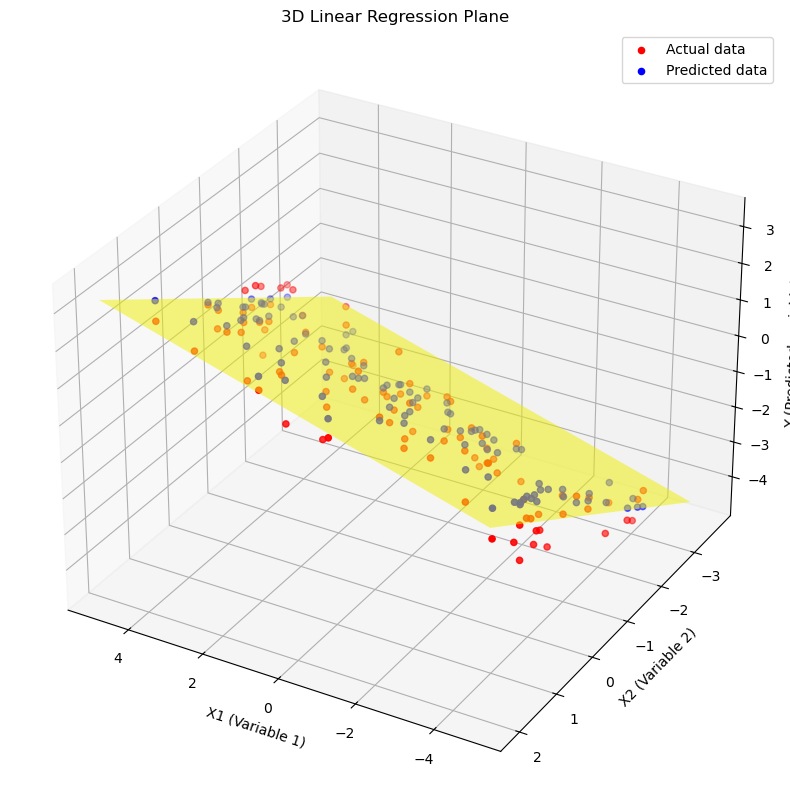

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Calculate predicted values

Y_pred_test = np.zeros(100)
X1_test=data[400:500, 0]
x2_test=data[400:500, 1]
print(X1_test.shape)
for i in range(100):
    Y_pred_test[i] = C[0] * X1_test[i] + C[1] * x2_test[i]

# Create a figure for the plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual data points
ax.scatter(data[400:500, 0], data[400:500, 1], y[400:500], marker='o', color='red', label='Actual data')

# Scatter plot of the predicted data points
ax.scatter(data[400:500, 0], data[400:500, 1], Y_pred_test, marker='o', color='blue', label='Predicted data')

# Create a meshgrid for plotting the regression plane

# Create a continuous mesh of variables (X1,x2) to predict the values of Y for each value of (X1,X2)

x_, y_= np.meshgrid(np.linspace(data[:, 0].min(), data[:, 0].max(), 10), #This function takes two 1D arrays (x and y) and returns two 2D matrices representing a grid.
                             np.linspace(data[:, 1].min(), data[:, 1].max(), 10))


z_= C[0] * x_+ C[1] * y_              # Prdicted linear regressed value for each point in the X1-X2 plane

# Plot the regression plane
ax.plot_surface(x_, y_, z_, color='yellow', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel("X1 (Variable 1)")
ax.set_ylabel("X2 (Variable 2)")
ax.set_zlabel("Y (Predicted variable)")
ax.set_title("3D Linear Regression Plane")
ax.legend()


# Use this to change the viewing angle on the 3D plot
ax.view_init(elev=30, azim=120)  
#ax.view_init(elev=20, azim=10)  
plt.show()


(100,)


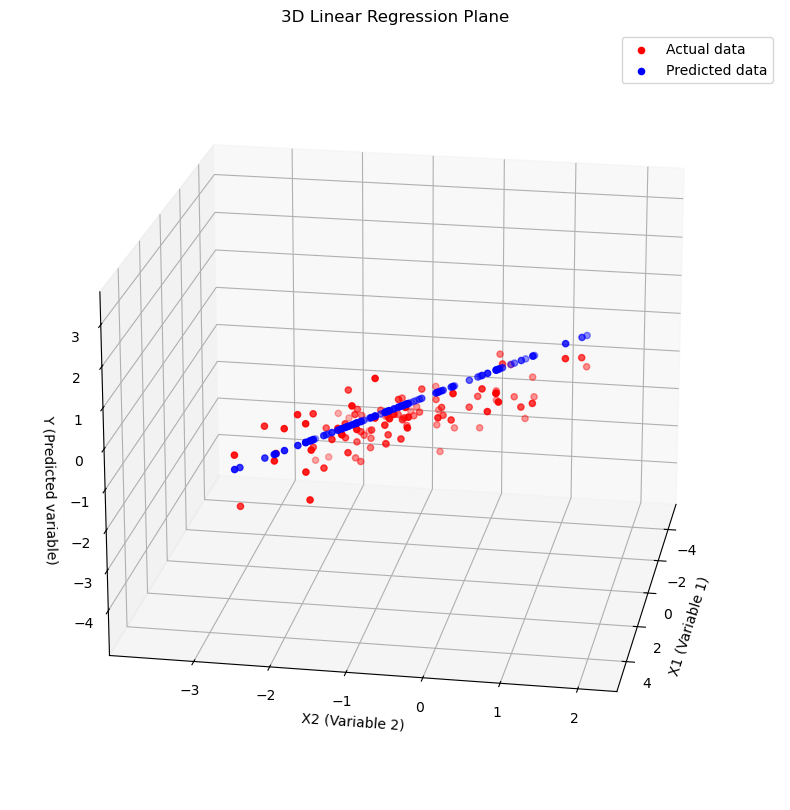

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Calculate predicted values

Y_pred_test = np.zeros(100)
X1_test=data[400:500, 0]
x2_test=data[400:500, 1]
print(X1_test.shape)
for i in range(100):
    Y_pred_test[i] = C[0] * X1_test[i] + C[1] * x2_test[i]

# Create a figure for the plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual data points
ax.scatter(data[400:500, 0], data[400:500, 1], y[400:500], marker='o', color='red', label='Actual data')

# Scatter plot of the predicted data points
ax.scatter(data[400:500, 0], data[400:500, 1], Y_pred_test, marker='o', color='blue', label='Predicted data')

# Create a meshgrid for plotting the regression plane

# Create a continuous mesh of variables (X1,x2) to predict the values of Y for each value of (X1,X2)

x_, y_= np.meshgrid(np.linspace(data[:, 0].min(), data[:, 0].max(), 10), #This function takes two 1D arrays (x and y) and returns two 2D matrices representing a grid.
                             np.linspace(data[:, 1].min(), data[:, 1].max(), 10))


z_= C[0] * x_+ C[1] * y_              # Prdicted linear regressed value for each point in the X1-X2 plane

# Plot the regression plane
ax.plot_surface(x_, y_, z_, color='yellow', alpha=0.5, rstride=100, cstride=100)

ax.set_xlabel("X1 (Variable 1)")
ax.set_ylabel("X2 (Variable 2)")
ax.set_zlabel("Y (Predicted variable)")
ax.set_title("3D Linear Regression Plane")
ax.legend()


# Use this to change the viewing angle on the 3D plot
ax.view_init(elev=20, azim=10)  
plt.show()
